In [ ]:

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 5.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader('AAPL',data_source='yahoo', start='2018-01-01',end='2022-02-08')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.135754
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.128590
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.319633
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.790058
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.634850
...,...,...,...,...,...,...
2022-02-02,175.880005,173.330002,174.750000,175.839996,84914300.0,175.616257
2022-02-03,176.240005,172.119995,174.479996,172.899994,89418100.0,172.679993
2022-02-04,174.100006,170.679993,171.679993,172.389999,82465400.0,172.389999


In [ ]:
df.shape

(1034, 6)

<function matplotlib.pyplot.show>

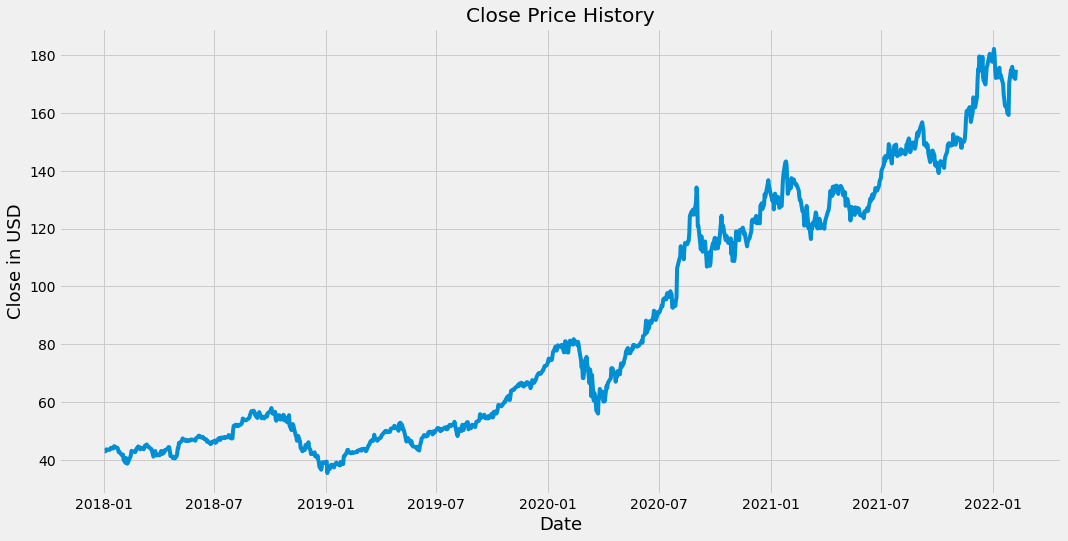

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close in USD', fontsize=18)
plt.show

In [ ]:
data = df.filter(['Close'])
dataset= data.values
training_data_len=math.ceil(len(dataset) * 0.8)
training_data_len


828

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)


In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train= np.array(x_train), np.array(y_train)


In [ ]:
x_train.shape

(768, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(150, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(150,return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

768/768 [==============================] - 47s 57ms/step - loss: 0.0018


In [ ]:
test_data= scaled_data[training_data_len- 60: , : ]
x_test=[]
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test= np.array(x_test)

In [ ]:
x_test=np.reshape(x_test, (x_test.shape[0],x_train.shape[1],1))


In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))

In [ ]:
rmse

4.150410070773595

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


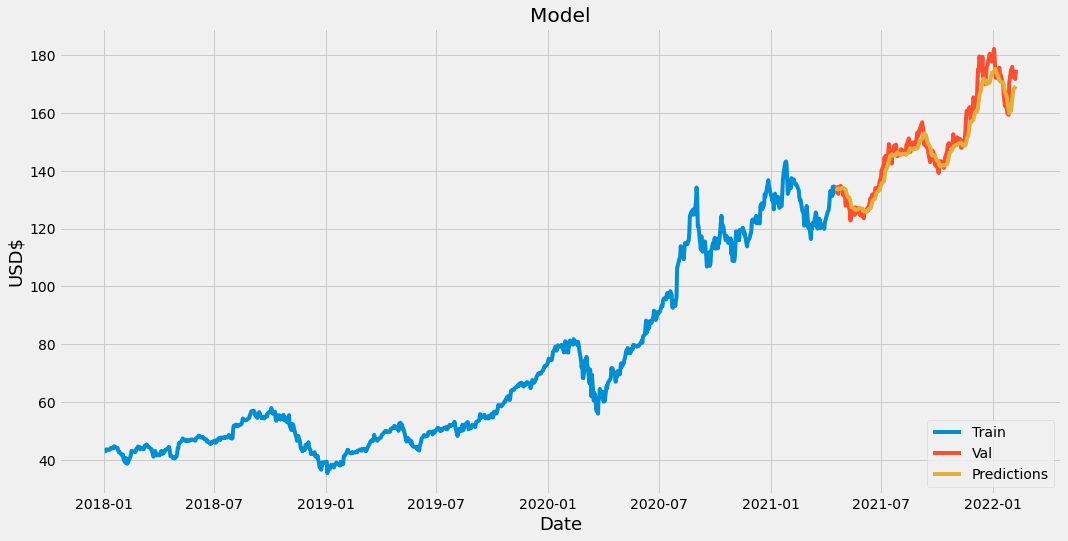

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
valid


,Close,Predictions
Date,,
2021-04-19,134.839996,132.937866
2021-04-20,133.110001,133.532516
2021-04-21,133.500000,133.763367
2021-04-22,131.940002,133.855942
2021-04-23,134.320007,133.657089
...,...,...
2022-02-02,175.839996,164.580276
2022-02-03,172.899994,166.676987
2022-02-04,172.389999,168.050476
